# Test results

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import evaluate
import merge
import load

To be able to compare team performances we agreed on a common test set. We generated it by splitting the original training data into 70% training and 30% test rows. Together with the actual submission, each team handed in their prediction for test set. This chapter evaluates these predictions.

In [117]:
test_predictions = merge.merged_predictions(test=True, keep_columns=['returnQuantity', 'articleID', 'productGroup', 'customerID', 'voucherID'])
test_train = evaluate.test_complement(test_predictions)

### How well do the teams perform on average?

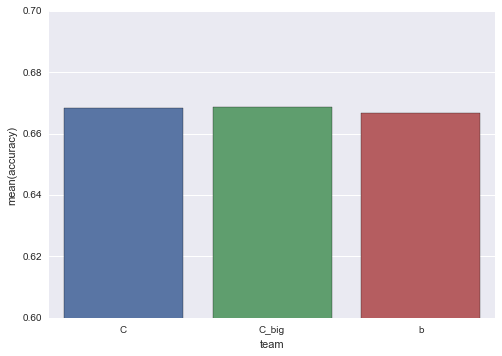

In [116]:
mean_accuracies = evaluate.mean_accuracies(test_predictions)

mean_accuracies = pd.DataFrame(mean_accuracies, columns=['accuracy'])
mean_accuracies.index.name = 'team'
mean_accuracies = mean_accuracies.reset_index()
ax = sns.barplot(x=mean_accuracies['team'], y=mean_accuracies['accuracy'], )
lim = ax.set_ylim([0.6, 0.7])

All teams showed similar accuracies around 67% on the test set.

### How are the confidences distributed?
The figure below shows box plot and probability distribution for each team. The confidences show similar central tendency but have different ranges. This shows that confidences are

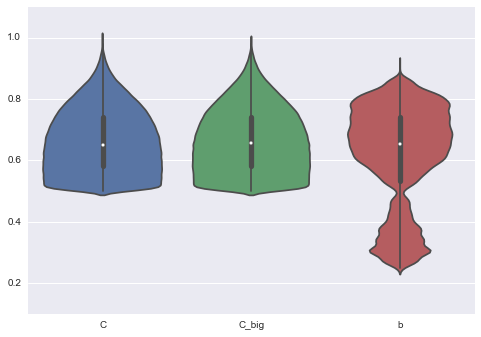

In [52]:
ax = sns.violinplot(data=test_predictions['confidence'])

### How do the teams perform in different splits?
All teams realisied that their classifiers performance depends highly on the amount of historical knowledge, e.g., the number of products returned by a customer. This realisation led us to divide classification into *splits* of known and unknown values.

The figure below shows the team performances seperated into splits.

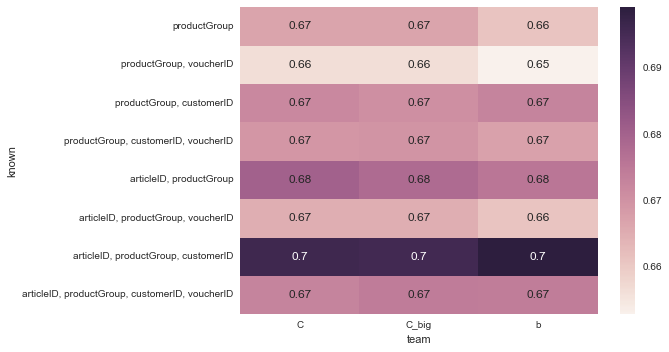

In [115]:
test_splits = evaluate.evaluate_split_performance(test_train, test_predictions)

split_accuracies = test_splits.ix[4:,]
min_acc = split_accuracies.min().min()
max_acc = split_accuracies.max().max()
ax = sns.heatmap(split_accuracies, vmin=min_acc, vmax=max_acc, annot=True)

Again, the submissions show similar performance.

The known splits *nothing known*, *only voucherID*, *only customerID* and *customerID and voucherID* do appear in the target data, but not this test set. You can find the relative size of each split in the test data in the figure below. 

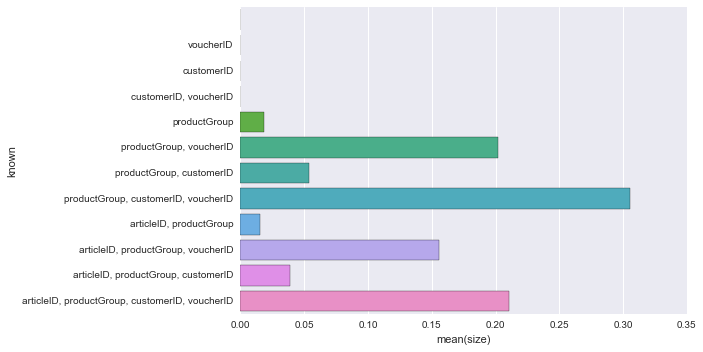

In [114]:
test_split_sizes = evaluate.split_sizes(test_train, test_predictions['original'])
ax = sns.barplot(x='size', y=test_split_sizes.index, data=test_split_sizes)

### How do the predictions in test set differ?

The figure below shows a comparison accross teams. The value in each cell is the percentage of rows that have different classifications.

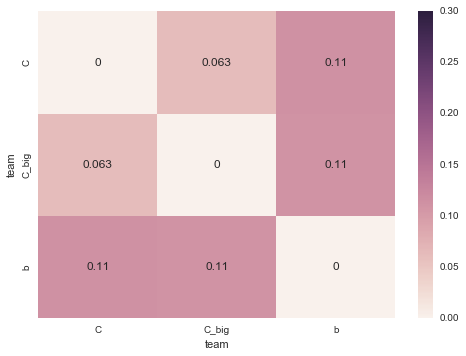

In [113]:
test_differences = evaluate.distinct_predictions(test_predictions)
ax = sns.heatmap(test_differences, vmin=0, vmax=0.3, annot=True)

The classifications provided by team C are similiar to each other. *C_big* was generated using a greater sampling of the training data, than *C*. This lead to a 6% difference in classification.

The classifications between team C and B differ in 11% of the rows.

### How do the predictions differ per split?
To make better sense of these differences we can explore the disagreements in splits. The figure below shows the distinct rows across the teams.

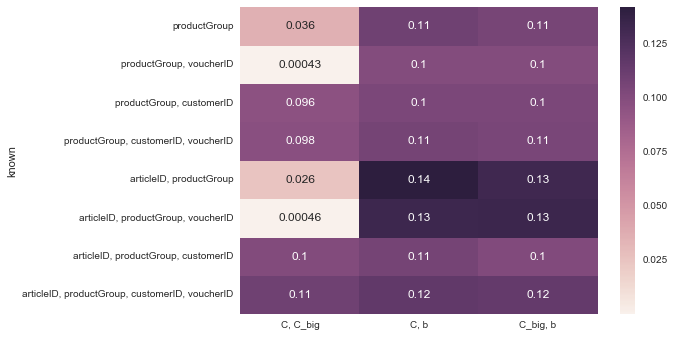

In [112]:
test_split_differences = evaluate.distinct_split_predictions(test_train, test_predictions)
ax = sns.heatmap(test_split_differences.ix[4:], annot=True)

Alas, the disagreements are not in few splits but evenly distributed.

### How confident are the classifiers in their disagreements?

The figure shows the mean confidence of each classifier seperated by splits. The classifiers show the greatest confidence in the splits with the greatest differences. (Note that the confidences are not comparabel accross classifiers.)

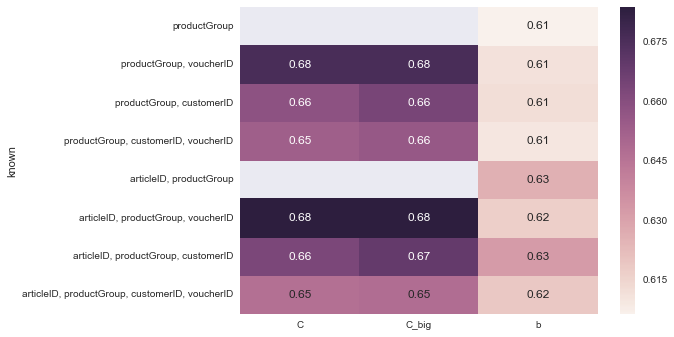

In [111]:
test_split_confidences = evaluate.split_mean_confidences(test_train, test_predictions)
ax = sns.heatmap(test_split_confidences.ix[4:], annot=True)

### Prediction differences by split

In [114]:
result_split_differences = merge.distinct_split_predictions(test=False)

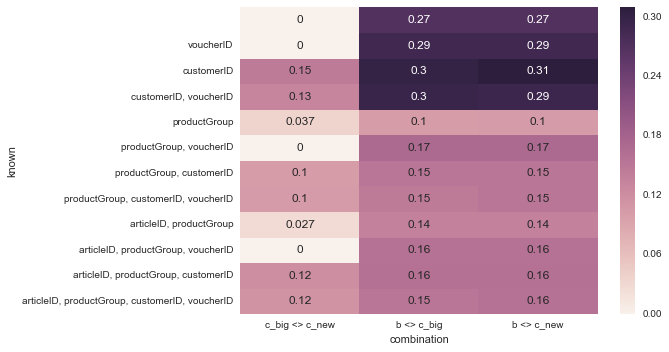

In [115]:
ax = sns.heatmap(result_split_differences.ix[:, ['c_big <> c_new', 'b <> c_big', 'b <> c_new']], annot=True)